In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import torch
import torch.nn as nn
import torchvision
from torchvision import models, datasets
from torch.autograd import Variable
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
#from old_grad_cam import gen_gcam_single_list
from main_gcam import gen_gcam_single, gen_gcam

In [9]:
displ_img = cv2.imread('/work/lisabdunlap/explain-eval/data/samples/cat_dog.png')
displ_img2 = cv2.imread('/work/lisabdunlap/train-tiny-imagenet/pytorch-tiny-imagenet/tiny-imagenet-200/val/n01641577/images/val_1251.JPEG')
gcams = []
#models = ['resnet18', 'vgg19', 'inception_v3', 'densenet201']
model = models.resnet18(pretrained = True)
gcams = gen_gcam([displ_img2], model, target_layer='layer4', single=True)

cuda dev  cuda:0
	#0: tailed_frog (0.24473)


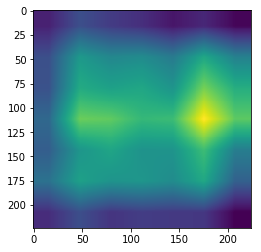

In [11]:
plt.imshow(gcams)

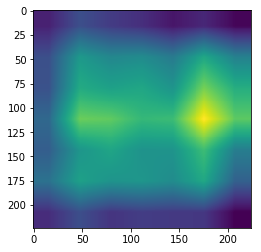

In [8]:
plt.imshow(gcams[1])

In [44]:
def cam_on_img(result, img):
    heatmap = cv2.cvtColor(cv2.applyColorMap(np.uint8((result / np.max(result)) * 255.0), cv2.COLORMAP_JET),
                                 cv2.COLOR_RGB2BGR)
    alpha = .6
    #img = np.uint8(img*255)
    cam = heatmap*alpha + np.float32(img)*(1-alpha)
    cam /= np.max(cam)
    return cam

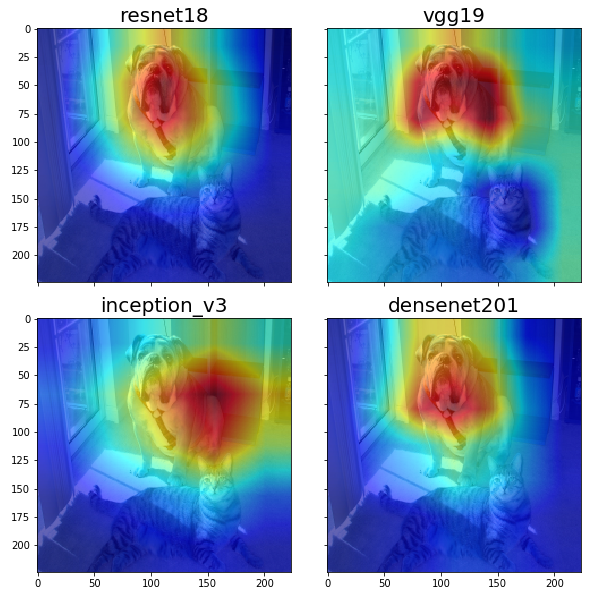

In [53]:
fig = plt.figure(figsize=(10,10))
plt.axis('off')
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.5,  # pad between axes in inch.
                 )
i=0
models = ['resnet18', 'vgg19', 'inception_v3', 'densenet201']
for ax, im in zip(grid, gcams):
    # Iterating over the grid returns the Axes.
    ax.set_title(models[i], size=20)
    ax.imshow(cam_on_img(im, displ_img))
    i+=1

plt.show()

In [6]:
def shh
w, h, _ = displ_img.shape
gcam =cv2.resize(gcam, (w, h))
heatmap = cv2.cvtColor(cv2.applyColorMap(np.uint8((gcam / np.max(gcam)) * 255.0), cv2.COLORMAP_JET),
                           cv2.COLOR_BGR2RGB)
alpha = .6
img = np.uint8(displ_img*255)
#img /= np.max(img)
#heatmap /= np.max(heatmap)
cam = heatmap*alpha + np.float32(img)*(1-alpha)
cam /= np.max(cam)

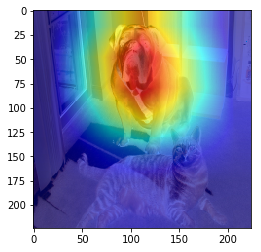

In [7]:
plt.imshow(cam)